# Linear Regression

## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df= pd.read_csv('../../Data/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

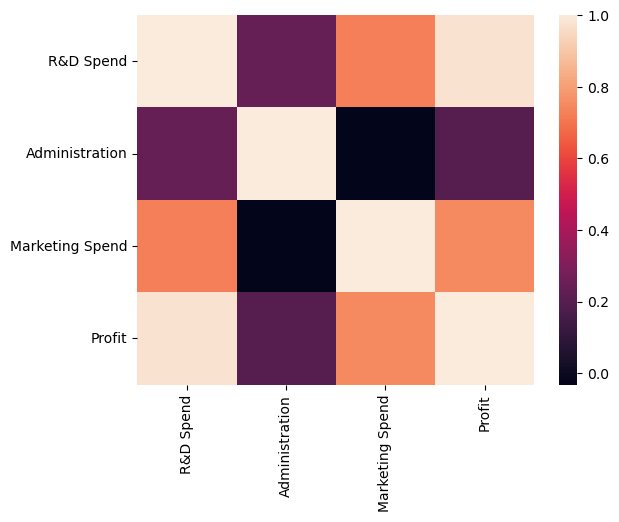

In [3]:
sns.heatmap(df.loc[:, df.columns != 'State'].corr())

Finding Coorelation with profit

In [4]:
df.loc[:, df.columns != 'State'].corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

[]

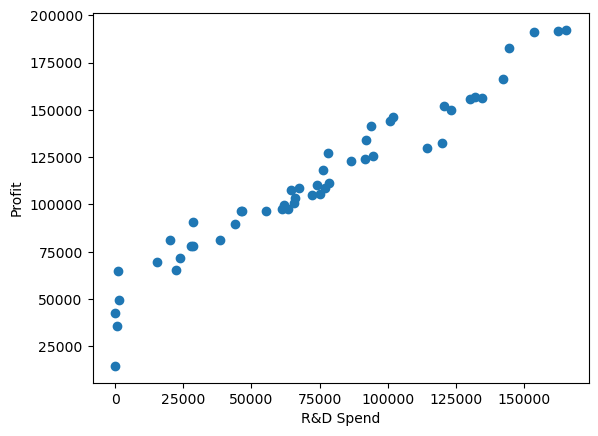

In [5]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.plot()

[]

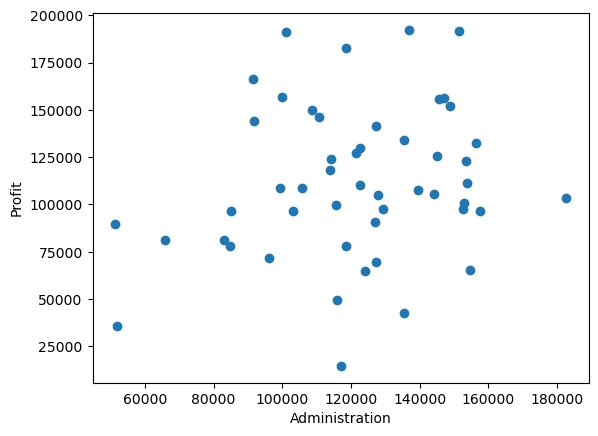

In [6]:
plt.scatter(df['Administration'], df['Profit'])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.plot()

[]

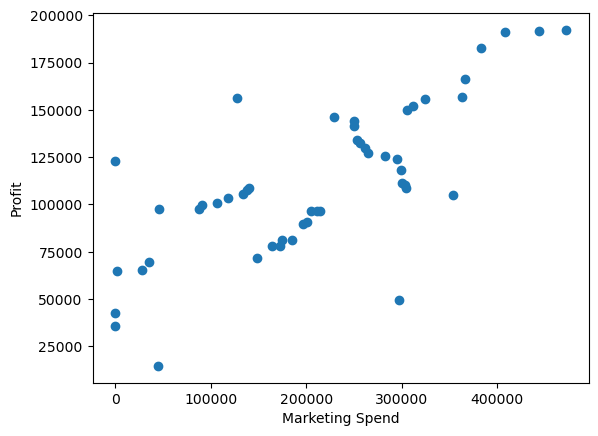

In [7]:
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.plot()

In [10]:
df_np = df.loc[:, df.columns != 'State'].to_numpy()
df_np.shape

(50, 4)

In [11]:
x_train, y_train = df_np[:, :3], df_np[:, -1]
x_train.shape, y_train.shape

((50, 3), (50,))

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
profit_prediction = model.predict(x_train)
profit_prediction

array([192521.25289008, 189156.76823227, 182147.2790962 , 173696.70002553,
       172139.51418327, 163580.7805712 , 158114.09666865, 160021.36304781,
       151741.69969865, 154884.68410995, 135509.01636714, 135573.71296074,
       129138.05418243, 127487.99166275, 149548.64633453, 146235.1599852 ,
       116915.40540144, 130192.44720781, 129014.2268059 , 115635.21636716,
       116639.6692309 , 117319.45164029, 114706.98171695, 109996.61522126,
       113362.96611314, 102237.72506481, 110600.5753503 , 114408.07145684,
       101660.02600497, 101794.98345176,  99452.37293606,  97687.85627575,
        99001.32898549,  97915.00780465,  89039.27374116,  90511.59956753,
        75286.17458546,  89619.5377079 ,  69697.43064804,  83729.01197692,
        74815.95399105,  74802.55623866,  70620.41182056,  60167.03996335,
        64611.3549157 ,  47650.64968691,  56166.20685261,  46490.58898335,
        49171.38815763,  48215.1341113 ])

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(profit_prediction, y_train), mean_squared_error(profit_prediction, y_train)

(6471.4503961048085, 78417126.01913083)

In [14]:
prediction_df = pd.DataFrame({'R&D Spend':df['R&D Spend'],
                              'Administration':df['Administration'],
                              'Marketing Spend':df['Marketing Spend'],
                              'Profit':df['Profit'],
                              'profit_prediction':profit_prediction})
prediction_df.head()


,R&D Spend,Administration,Marketing Spend,Profit,profit_prediction
0,165349.20,136897.80,471784.10,192261.83,192521.252890
1,162597.70,151377.59,443898.53,191792.06,189156.768232
2,153441.51,101145.55,407934.54,191050.39,182147.279096
3,144372.41,118671.85,383199.62,182901.99,173696.700026
4,142107.34,91391.77,366168.42,166187.94,172139.514183


In [15]:
prediction_df.tail()

,R&D Spend,Administration,Marketing Spend,Profit,profit_prediction
45,1000.23,124153.04,1903.93,64926.08,47650.649687
46,1315.46,115816.21,297114.46,49490.75,56166.206853
47,0.00,135426.92,0.00,42559.73,46490.588983
48,542.05,51743.15,0.00,35673.41,49171.388158
49,0.00,116983.80,45173.06,14681.40,48215.134111


AttributeError: type object 'LinearRegression' has no attribute 'coef_'